In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [66]:
#pca is used to reduce the dimensionality of data
# we can reduce and dimensional data to 1,2,3...n and check what can we the best fit 
#it wouldn't work on the data where the data is predictable 
df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

In [67]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df.sample()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
43220,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
import matplotlib.pyplot as plt

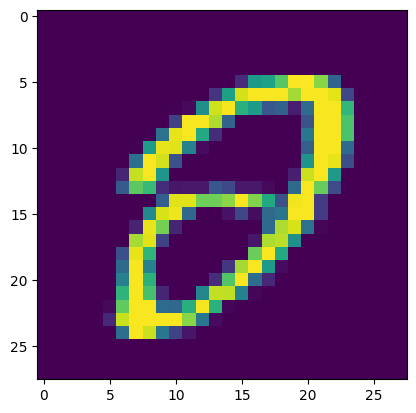

In [70]:
plt.imshow(df.iloc[19502,1:].values.reshape(28,28))

In [71]:
from  sklearn.neighbors import KNeighborsClassifier

In [72]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
X_train.shape

(48000, 784)

In [75]:
KNN =  KNeighborsClassifier()

In [76]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred = KNN.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # the accuracy is pretty high but take more time to train

0.9715

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
from sklearn.decomposition import PCA


In [83]:
pca = PCA(n_components=200) # hyperparameter to choose the principal component
X_train_tr = pca.fit_transform(X_train)
X_test_tr = pca.transform(X_test)


In [84]:
X_train_tr.shape #with 200 principal component 

(48000, 200)

In [85]:
knn = KNeighborsClassifier()
knn.fit(X_train_tr,y_train)

KNeighborsClassifier()

In [86]:
y_pred = knn.predict(X_test_tr)
y_pred

array([7, 3, 8, ..., 9, 7, 2])

In [87]:
accuracy_score(y_test, y_pred)

0.9545